In [ ]:
# # instalo geopandas
!pip install geopandas

In [ ]:
!pip install contextily

In [ ]:
import pandas as pd
import numpy as np
import geopandas as gpd

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# importamos la libreria de mapas base
import contextily as ctx

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#/content/drive/MyDrive/Técnicas de Analisis de Datos del Transporte/Técnicas de análisis/Técnicas de análisis/Notebooks/Trabajo práctico 1/Trabajo práctico 1/Estaciones_ferrocarril.geojson

In [ ]:
sube_ffcc = pd.read_csv('/content/drive/MyDrive/Técnicas de Analisis de Datos del Transporte/Técnicas de análisis/Técnicas de análisis/Notebooks/Trabajo práctico 1/TP 1  y TP final/TP1/SUBE_ferrocarril.csv')

In [ ]:
estaciones_ffcc = gpd.read_file('/content/drive/MyDrive/Técnicas de Analisis de Datos del Transporte/Técnicas de análisis/Técnicas de análisis/Notebooks/Trabajo práctico 1/TP 1  y TP final/TP1/Estaciones_ferrocarril.geojson')

In [ ]:
estaciones_ffcc.head()

,gid,fna,nam,geometry
0,312,Estación Bella Vista,Bella Vista,POINT (-58.68477 -34.56385)
1,313,Estación San Miguel,San Miguel,POINT (-58.71297 -34.54424)
2,314,Estación General Lemos,General Lemos,POINT (-58.70094 -34.53283)
3,315,Estación Teniente Agneta,Teniente Agneta,POINT (-58.67881 -34.54886)
4,316,Estación Sargento Barrufaldi,Sargento Barrufaldi,POINT (-58.65997 -34.56266)


In [ ]:
estaciones_ffcc = estaciones_ffcc.to_crs('EPSG:3857')

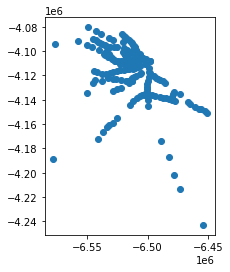

In [ ]:
estaciones_ffcc.plot()

In [ ]:
#estaciones_ffcc['geometry'] = estaciones_ffcc['geometry'].centroid

In [ ]:
sube_ffcc.head()

,id_tarjeta,modo,lat,lon,sexo,interno_bus,tipo_trx_tren,etapa_red_sube,id_tarifa,hora,gid,linea
0,37030072,TRE,-34.588,-58.374,M,NaN,CHECK IN,0,1,8,1473,FFCC_SANM
1,37030072,TRE,-34.588,-58.374,M,NaN,CHECK IN,0,1,8,685,FFCC_SANM
2,37030241,TRE,-34.660,-58.668,F,NaN,CHECK IN,0,3,18,1452,FFCC SAR
3,37030241,TRE,-34.664,-58.728,F,NaN,CHECK IN,1,3,6,518,FFCC SAR
4,37030241,TRE,-34.608,-58.406,F,NaN,CHECK IN,1,3,12,679,FFCC SAR


In [ ]:
sube_ffcc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1386619 entries, 0 to 1386618
Data columns (total 12 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   id_tarjeta      1386619 non-null  int64  
 1   modo            1386619 non-null  object 
 2   lat             1386619 non-null  float64
 3   lon             1386619 non-null  float64
 4   sexo            881582 non-null   object 
 5   interno_bus     2216 non-null     float64
 6   tipo_trx_tren   1386619 non-null  object 
 7   etapa_red_sube  1386619 non-null  int64  
 8   id_tarifa       1386619 non-null  int64  
 9   hora            1386619 non-null  int64  
 10  gid             1386619 non-null  int64  
 11  linea           1386619 non-null  object 
dtypes: float64(3), int64(5), object(4)
memory usage: 126.9+ MB


In [ ]:
sube_estaciones_merge = sube_ffcc.merge(estaciones_ffcc, on='gid', how='left')
sube_estaciones_merge.sample(5)

,id_tarjeta,modo,lat,lon,sexo,interno_bus,tipo_trx_tren,etapa_red_sube,id_tarifa,hora,gid,linea,fna,nam,geometry
1313547,9439457958,TRE,-34.640,-58.526,NaN,NaN,CHECK IN,0,1,11,1413,FFCC SAR,Estación Liniers,Liniers,POINT (-6515160.386 -4114923.569)
157494,1139039223,TRE,-34.824,-58.392,NaN,NaN,CHECK IN,1,1,16,663,FFCC ROCA,Estación Burzaco,Burzaco,POINT (-6500111.755 -4140139.458)
676277,4839488877,TRE,-34.650,-58.790,M,NaN,CHECK IN,1,1,9,583,FFCC SAR,Estación Moreno,Moreno,POINT (-6544509.271 -4116459.712)
234023,1639493579,TRE,-34.772,-58.648,NaN,NaN,CHECK IN,0,1,6,1463,FFCC_BELG_SUR,Estación González Catán,González Catán,POINT (-6528533.906 -4132911.366)
1326220,9539412000,TRE,-34.628,-58.380,NaN,NaN,CHECK IN,0,1,14,1475,FFCC ROCA,Estación Plaza Constitución,Plaza Constitución,POINT (-6498901.621 -4113479.875)


In [ ]:
sube_estaciones_merge['cant'] = 1

In [ ]:
sube_estaciones_merge.head()

,id_tarjeta,modo,lat,lon,sexo,interno_bus,tipo_trx_tren,etapa_red_sube,id_tarifa,hora,gid,linea,fna,nam,geometry,cant
0,37030072,TRE,-34.588,-58.374,M,NaN,CHECK IN,0,1,8,1473,FFCC_SANM,Estación Retiro,Retiro,POINT (-6498226.438 -4108279.645),1
1,37030072,TRE,-34.588,-58.374,M,NaN,CHECK IN,0,1,8,685,FFCC_SANM,Estación Retiro,Retiro,POINT (-6498100.143 -4108195.217),1
2,37030241,TRE,-34.660,-58.668,F,NaN,CHECK IN,0,3,18,1452,FFCC SAR,Estación Ituzaingó,Ituzaingó,POINT (-6530698.422 -4117718.000),1
3,37030241,TRE,-34.664,-58.728,F,NaN,CHECK IN,1,3,6,518,FFCC SAR,Estación Merlo,Merlo,POINT (-6537523.963 -4118379.079),1
4,37030241,TRE,-34.608,-58.406,F,NaN,CHECK IN,1,3,12,679,FFCC SAR,Estación Once de Septiembre,Once de Septiembre,POINT (-6501845.617 -4110778.772),1


In [ ]:
sube_estaciones_merge_group = sube_estaciones_merge.groupby(['linea']).sum().sort_values('cant',ascending=False)
sube_estaciones_merge_group

,id_tarjeta,lat,lon,interno_bus,etapa_red_sube,id_tarifa,hora,gid,cant
linea,,,,,,,,,
FFCC ROCA,2562113348995155,-1.783018e+07,-2.996102e+07,0.0,302727,965810,6515558,631621499,513343
FFCC SAR,1535352051007337,-1.064760e+07,-1.800927e+07,0.0,180139,597758,3799154,300145390,307375
FFCC_SANM,668832316188745,-4.641001e+06,-7.865222e+06,0.0,75257,262739,1693600,124702538,134267
FCC MITRE_TIGRE,572545919761001,-3.960432e+06,-6.709934e+06,0.0,46656,181606,1468589,151422707,114747
FFCC_BELGRANO_NORTE,503254075259639,-3.497594e+06,-5.928239e+06,1431.0,56462,179703,1279456,101528697,101276
FFCC URQUIZA,421364530562162,-2.914879e+06,-4.936416e+06,0.0,47479,144861,1063538,77924033,84303
FFCC_SUAREZ,396241661128652,-2.744652e+06,-4.642570e+06,6171.0,29308,128524,1014622,108197703,79396
FFCC_BELG_SUR,246173980917439,-1.723564e+06,-2.907071e+06,0.0,17531,99772,586295,68041514,49640
FFCC SAR MERLO - LOBOS,8950174600097,-6.259990e+04,-1.060073e+05,0.0,1063,3529,23431,1168045,1804


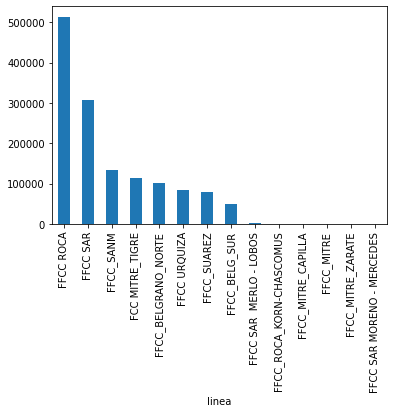

In [ ]:
sube_estaciones_merge_group.cant.plot(kind='bar')

In [ ]:
sube_estaciones_merge.shape

(1386619, 16)

In [ ]:
sube_estaciones_merge_group_hora = sube_estaciones_merge.groupby(['hora']).sum().sort_values('hora',ascending=True)
sube_estaciones_merge_group_hora

,id_tarjeta,lat,lon,interno_bus,etapa_red_sube,id_tarifa,gid,cant
hora,,,,,,,,
3,2138775879466,-1.457583e+04,-2.461576e+04,0.0,169,757,453151,420
4,63990873758072,-4.438309e+05,-7.493299e+05,0.0,7609,23144,12057239,12793
5,249155580831526,-1.730048e+06,-2.921621e+06,57.0,31697,94678,48056735,49896
6,505529262587799,-3.507039e+06,-5.922287e+06,216.0,64793,196155,103461707,101186
7,611099160397014,-4.243160e+06,-7.165246e+06,369.0,66780,225278,131140990,122454
8,526605516564749,-3.664864e+06,-6.188358e+06,462.0,53687,190707,116129955,105774
9,361243606132654,-2.506884e+06,-4.231947e+06,300.0,37070,133358,80550058,72346
10,309480503352951,-2.155229e+06,-3.637687e+06,204.0,31285,119774,69163698,62192
11,326971704593077,-2.264149e+06,-3.821339e+06,345.0,32557,125812,73447862,65337


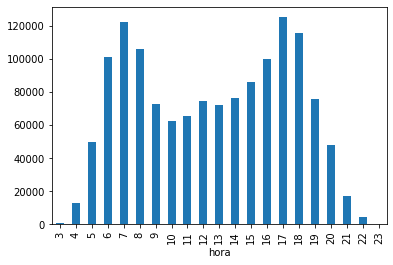

In [ ]:
sube_estaciones_merge_group_hora.cant.plot(kind='bar')

In [ ]:
sube_estaciones_merge_group_estaciones = sube_estaciones_merge.groupby(['fna']).sum().sort_values('cant',ascending=False)
sube_estaciones_merge_group_estaciones = sube_estaciones_merge_group_estaciones.iloc[:20]
sube_estaciones_merge_group_estaciones

,id_tarjeta,lat,lon,interno_bus,etapa_red_sube,id_tarifa,hora,gid,cant
fna,,,,,,,,,
Estación Plaza Constitución,802195232782523,-5.561915e+06,-9.376937e+06,0.0,147184,295185,2494913,236913025,160619
Estación Retiro,577927475779478,-4.009359e+06,-6.766344e+06,0.0,87920,189686,1645461,144164918,115912
Estación Once de Septiembre,303892210725257,-2.107073e+06,-3.555991e+06,0.0,44200,111356,930223,41340236,60884
Estación Lomas de Zamora,204090251091373,-1.427015e+06,-2.397296e+06,0.0,18662,76762,510845,60303919,41051
Estación Merlo,190100070932278,-1.318931e+06,-2.234542e+06,0.0,27049,79423,383806,19709382,38049
Estación Morón,181388578354594,-1.260667e+06,-2.132816e+06,0.0,22441,71540,428005,52867405,36385
Estación Moreno,176925418890690,-1.227442e+06,-2.082577e+06,0.0,26709,78630,371224,20652192,35424
Estación Lanús,164894268098843,-1.149564e+06,-1.933935e+06,0.0,19740,61623,389279,55179586,33121
Estación Federico Lacroze,139631499847926,-9.681313e+05,-1.636300e+06,0.0,23883,45626,436315,19146528,27992


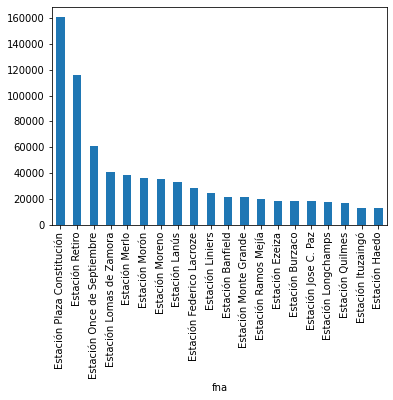

In [ ]:
sube_estaciones_merge_group_estaciones.cant.plot(kind='bar')

Pruebas para los últimos dos puntos

In [ ]:
#f, ax = plt.subplots(1,figsize=(8,8))
#sube_estaciones_merge.loc[:,:].plot(ax=ax,color='grey')
#sube_estaciones_merge.plot(ax=ax)
#evitamos la visualizacion de los ejes
#ax.set_axis_off()

In [ ]:
#f, ax = plt.subplots(1,figsize=(8,8))
#sube_estaciones_merge.plot(column='fna',linewidth=0.1, 
 #               ax=ax,
  #              legend=True, markersize = (centroides.POBLACION/50)**1.6,
   #             cmap = 'Blues')

#ax.set_axis_off()
#ax.set_title('% de hogares con NBI - Comuna 1 - 2010')

#ctx.add_basemap(ax=ax)
#;

In [ ]:
#sube_ffcc['cant'] = 1
#sube_ffcc_2=sube_ffcc.groupby(['gid']).sum().sort_values('cant',ascending=False)

In [ ]:
#sube_estaciones_merge_2 = estaciones_ffcc.merge(sube_ffcc_2, on='gid', how='left')


In [ ]:
#sube_estaciones_merge_2.loc[:,'geometry'] = sube_estaciones_merge_2.geometry.point
#sube_estaciones_merge_2.head()

In [ ]:
# leemos el dataset de comunas
ruta_comunas = '/content/drive/MyDrive/Técnicas de Analisis de Datos del Transporte/Técnicas de análisis/Técnicas de análisis/datos/CABA_comunas.geojson'
comunas = gpd.read_file(ruta_comunas)
comunas = comunas.to_crs('EPSG:3857')

In [ ]:
amba= gpd.read_file('/content/drive/MyDrive/Técnicas de Analisis de Datos del Transporte/Técnicas de análisis/Técnicas de análisis/datos/Censo Argentina 2010/Radios_AMBA.geojson')
amba = amba.to_crs('EPSG:3857')

In [ ]:
amba.head()

,PROV,DEPTO,FRAC,RADIO,Region,geometry
0,06,252,16,01,GBA,"MULTIPOLYGON (((-6541689.601 -4067808.182, -65..."
1,06,252,01,01,GBA,"MULTIPOLYGON (((-6550319.037 -4065058.127, -65..."
2,06,252,01,02,GBA,"MULTIPOLYGON (((-6548331.435 -4065627.806, -65..."
3,06,252,06,02,GBA,"MULTIPOLYGON (((-6552785.668 -4066120.650, -65..."
4,06,252,02,08,GBA,"MULTIPOLYGON (((-6544882.639 -4067131.950, -65..."


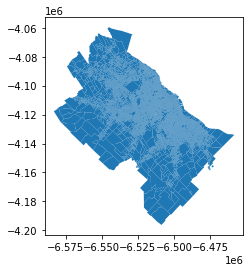

In [ ]:
amba.plot()

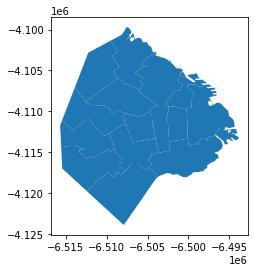

In [ ]:
comunas.plot()

In [ ]:
sube_estaciones_merge

,id_tarjeta,modo,lat,lon,sexo,interno_bus,tipo_trx_tren,etapa_red_sube,id_tarifa,hora,gid,linea,fna,nam,geometry,cant
0,37030072,TRE,-34.588,-58.374,M,NaN,CHECK IN,0,1,8,1473,FFCC_SANM,Estación Retiro,Retiro,POINT (-6498226.438 -4108279.645),1
1,37030072,TRE,-34.588,-58.374,M,NaN,CHECK IN,0,1,8,685,FFCC_SANM,Estación Retiro,Retiro,POINT (-6498100.143 -4108195.217),1
2,37030241,TRE,-34.660,-58.668,F,NaN,CHECK IN,0,3,18,1452,FFCC SAR,Estación Ituzaingó,Ituzaingó,POINT (-6530698.422 -4117718.000),1
3,37030241,TRE,-34.664,-58.728,F,NaN,CHECK IN,1,3,6,518,FFCC SAR,Estación Merlo,Merlo,POINT (-6537523.963 -4118379.079),1
4,37030241,TRE,-34.608,-58.406,F,NaN,CHECK IN,1,3,12,679,FFCC SAR,Estación Once de Septiembre,Once de Septiembre,POINT (-6501845.617 -4110778.772),1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1386614,9939599500,TRE,-34.852,-58.522,F,NaN,CHECK IN,0,4,4,1458,FFCC ROCA,Estación Ezeiza,Ezeiza,POINT (-6514738.789 -4144049.565),1
1386615,9939599500,TRE,-34.708,-58.390,F,NaN,CHECK IN,1,4,14,1666,FFCC ROCA,Estación Lanús,Lanús,POINT (-6500034.855 -4124176.693),1
1386616,9939599502,TRE,-34.604,-58.564,F,NaN,CHECK IN,0,1,7,578,FFCC_SANM,Estación Caseros,Caseros,POINT (-6519438.544 -4110296.104),1
1386617,9939599507,TRE,-34.640,-58.526,NaN,NaN,CHECK IN,0,1,7,1413,FFCC SAR,Estación Liniers,Liniers,POINT (-6515160.386 -4114923.569),1


In [ ]:
sube_estaciones_merge_group_estaciones_geo = sube_estaciones_merge.groupby(['gid','hora','linea']).sum().sort_values('cant',ascending=False)
#sube_estaciones_merge_group_estaciones_geo = sube_estaciones_merge_group_estaciones.iloc[:20]
sube_estaciones_merge_group_estaciones_geo=sube_estaciones_merge_group_estaciones_geo.reset_index(drop=False)
sube_estaciones_merge_group_estaciones_geo

,gid,hora,linea,id_tarjeta,lat,lon,interno_bus,etapa_red_sube,id_tarifa,cant
0,1475,18,FFCC ROCA,126846217156959,-878339.220,-1.480809e+06,0.0,24026,44525,25365
1,1475,17,FFCC ROCA,99166975553394,-684768.700,-1.154464e+06,0.0,18584,35930,19775
2,1475,19,FFCC ROCA,84579613387260,-587879.556,-9.911173e+05,0.0,16471,30266,16977
3,1475,16,FFCC ROCA,79172295399288,-551035.364,-9.290009e+05,0.0,14178,29677,15913
4,1475,15,FFCC ROCA,75252056947048,-524025.524,-8.834645e+05,0.0,13548,28340,15133
...,...,...,...,...,...,...,...,...,...,...
3598,513,22,FFCC SAR MERLO - LOBOS,8278631357,-69.568,-1.176720e+02,0.0,0,3,2
3599,1676,15,FFCC ROCA,7076937752,-69.676,-1.161880e+02,0.0,0,7,2
3600,524,22,FFCC_BELGRANO_NORTE,17178823263,-69.008,-1.172400e+02,0.0,0,2,2
3601,1603,23,FFCC_SANM,11176716147,-69.204,-1.169880e+02,0.0,0,6,2


In [ ]:
sube_estaciones_merge_2 = estaciones_ffcc.merge(sube_estaciones_merge_group_estaciones_geo, on='gid', how='right')
sube_estaciones_merge_2 =sube_estaciones_merge_2.rename({'fna':'estacion'},axis=1)
sube_estaciones_merge_2

,gid,estacion,nam,geometry,hora,linea,id_tarjeta,lat,lon,interno_bus,etapa_red_sube,id_tarifa,cant
0,1475,Estación Plaza Constitución,Plaza Constitución,POINT (-6498901.621 -4113479.875),18,FFCC ROCA,126846217156959,-878339.220,-1.480809e+06,0.0,24026,44525,25365
1,1475,Estación Plaza Constitución,Plaza Constitución,POINT (-6498901.621 -4113479.875),17,FFCC ROCA,99166975553394,-684768.700,-1.154464e+06,0.0,18584,35930,19775
2,1475,Estación Plaza Constitución,Plaza Constitución,POINT (-6498901.621 -4113479.875),19,FFCC ROCA,84579613387260,-587879.556,-9.911173e+05,0.0,16471,30266,16977
3,1475,Estación Plaza Constitución,Plaza Constitución,POINT (-6498901.621 -4113479.875),16,FFCC ROCA,79172295399288,-551035.364,-9.290009e+05,0.0,14178,29677,15913
4,1475,Estación Plaza Constitución,Plaza Constitución,POINT (-6498901.621 -4113479.875),15,FFCC ROCA,75252056947048,-524025.524,-8.834645e+05,0.0,13548,28340,15133
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3598,393,Estación Altamirano,Altamirano,POINT (-6473373.853 -4213069.311),6,FFCC_ROCA_KORN-CHASCOMUS,20855515922,-141.448,-2.326080e+02,0.0,0,18,4
3599,393,Estación Altamirano,Altamirano,POINT (-6473373.853 -4213069.311),14,FFCC_ROCA_KORN-CHASCOMUS,20918082604,-106.086,-1.744560e+02,0.0,0,3,3
3600,1651,Estación López Camelo,López Camelo,POINT (-6531942.155 -4088978.249),6,FFCC_MITRE_CAPILLA,14315437232,-103.338,-1.760340e+02,0.0,0,7,3
3601,541,Estación Dr. A. Schweitzer,Dr. A. Schweitzer,POINT (-6520466.280 -4092373.542),17,FFCC_MITRE_CAPILLA,15614443451,-103.416,-1.757220e+02,0.0,0,3,3


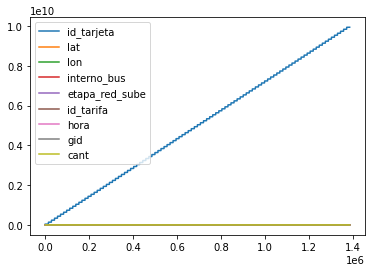

In [ ]:
sube_estaciones_merge.plot()

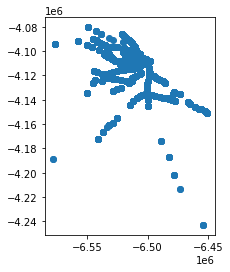

In [ ]:
sube_estaciones_merge_2.plot()

In [ ]:
sube_estaciones_merge_2.loc[sube_estaciones_merge_2.hora == 8,:].iloc[:20].reset_index(drop=True)

,gid,estacion,nam,geometry,hora,linea,id_tarjeta,lat,lon,interno_bus,etapa_red_sube,id_tarifa,cant
0,1475,Estación Plaza Constitución,Plaza Constitución,POINT (-6498901.621 -4113479.875),8,FFCC ROCA,15409749035977,-106446.472,-179460.120,0.0,2759,5504,3074
1,679,Estación Once de Septiembre,Once de Septiembre,POINT (-6501845.617 -4110778.772),8,FFCC SAR,6064981268273,-43086.960,-72715.470,0.0,1032,2253,1245
2,518,Estación Merlo,Merlo,POINT (-6537523.963 -4118379.079),8,FFCC SAR,17007301276254,-122363.920,-207309.840,0.0,2644,7785,3530
3,518,Estación Merlo,Merlo,POINT (-6537523.963 -4118379.079),8,FFCC SAR MERLO - LOBOS,76538540425,-658.616,-1115.832,0.0,16,39,19
4,583,Estación Moreno,Moreno,POINT (-6544509.271 -4116459.712),8,FFCC SAR,15086198618732,-106271.550,-180308.930,0.0,2422,7186,3067
5,583,Estación Moreno,Moreno,POINT (-6544509.271 -4116459.712),8,FFCC SAR MORENO - MERCEDES,16115797172,-103.950,-176.370,0.0,4,9,3
6,684,Estación Federico Lacroze,Federico Lacroze,POINT (-6507232.268 -4107863.381),8,FFCC URQUIZA,3661600020796,-25559.054,-43198.984,0.0,636,1168,739
7,1472,Estación Retiro,Retiro,POINT (-6498335.780 -4108382.607),8,FCC MITRE_TIGRE,8991997159008,-63130.400,-106536.200,0.0,2258,3282,1825
8,1472,Estación Retiro,Retiro,POINT (-6498335.780 -4108382.607),8,FFCC_SUAREZ,5503044031162,-37636.096,-63513.088,0.0,1285,2055,1088
9,1472,Estación Retiro,Retiro,POINT (-6498335.780 -4108382.607),8,FFCC_MITRE,16194868888,-172.960,-291.880,0.0,0,8,5


In [ ]:
#sube_estaciones_merge_2.plot(ax = ax1, marker='.', color='black', markersize = sube_estaciones_merge_2['cant']**.7,alpha=0.4)

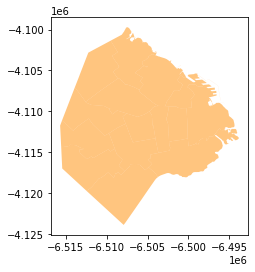

In [ ]:
comunas.plot(alpha=0.5,color='darkorange')

In [ ]:
sube_estaciones_merge_2.loc[:,'cant'].max()

25365

In [ ]:
def verRanking20estaciones(hora, amba = amba):

    
    max_trx_linea = sube_estaciones_merge_2.loc[:,'cant'].astype(float).max()       

    #genero los ejes
    fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(24,9))
    
    #ordeno las estaciones
    subdata = sube_estaciones_merge_2.loc[sube_estaciones_merge_2.hora == hora,:].iloc[:20]
    
#    subdata = estaciones.loc[estaciones.linea==linea,:].sort_values(by='cant')
    
    #ploteo el mapa base
    amba.plot(ax=ax1,alpha=0.5,color='grey')
    comunas.plot(ax=ax1,alpha=0.5,color='darkorange')
    #ploteo estaciones de la linea seleccionada y las otras
#    estaciones.plot(ax = ax1, marker='.', color='black', markersize = estaciones['cant']**.7,alpha=0.4)
    sube_estaciones_merge_2.plot(ax = ax1, marker='.', color='black', markersize = sube_estaciones_merge_2['cant']**.7,alpha=0.4)
    subdata.plot(ax = ax1, marker='.', color='c', markersize = subdata['cant']**.7,alpha=0.8)
    ctx.add_basemap(ax=ax1, source=ctx.providers.CartoDB.Positron)
    #elimino los ejes
    ax1.set_axis_off()
    
    #creo el bar plot
    sns.barplot(x="estacion", y="cant", data=subdata,ax=ax2,color='c')

    # Eliminamos los bordes que no consideramos necesarios
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.spines['left'].set_visible(False)
    ax2.spines['bottom'].set_visible(False)
    #agrego etiquetas para eje x
    for tick in ax2.get_xticklabels():
        tick.set_rotation(70)
    
    #equiparo la proporcion
    ax2.set_xlabel('')
    ax2.set_ylabel('Cantidad de transacciones')
    ax2.set_ylim(0,max_trx_linea)
    fig.suptitle('Ranking estaciones FFCC' + ' - '+ str(hora) + ' hs ' , fontsize=16)
    return fig

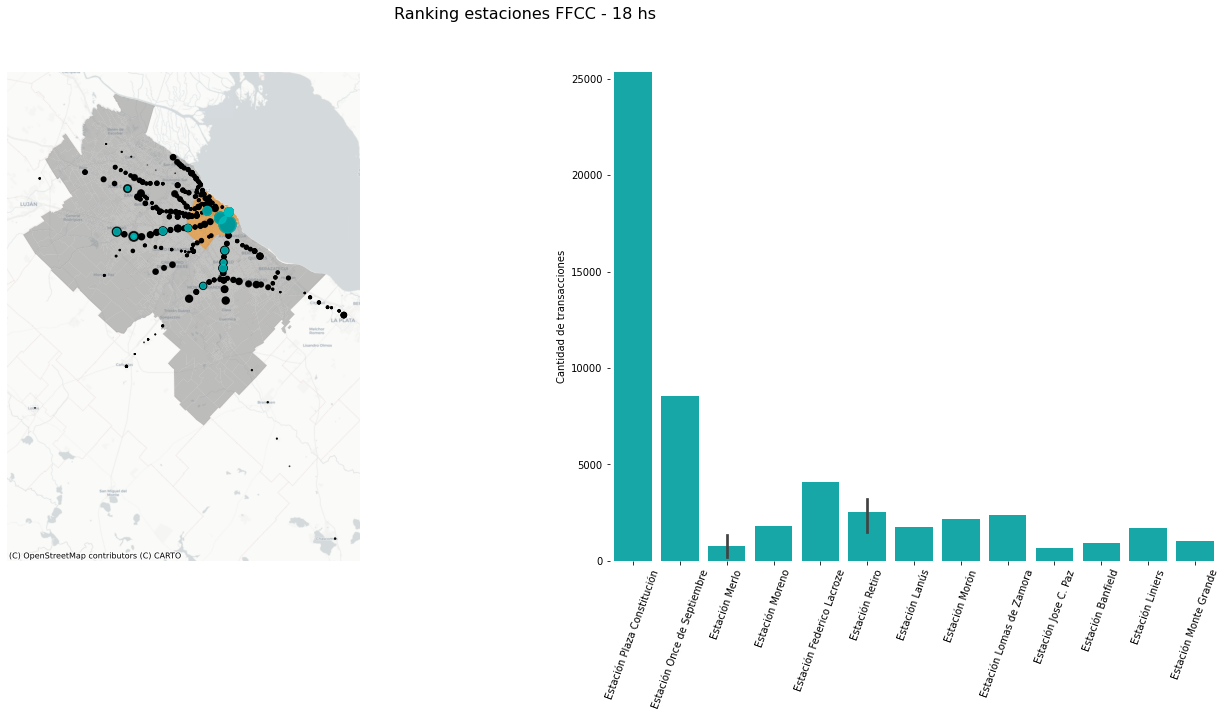

In [ ]:
f = verRanking20estaciones(hora = 18)

In [ ]:
#importamos la libreria que nos permite manipular imagenes
from PIL import Image

In [ ]:
frames = []
for hora in range(3, 24):
  f = verRanking20estaciones(hora = hora);
  foto = f'Ranking_20_estaciones_{str(hora).zfill(2)}hs.png'
  f.savefig(foto)
  new_frame = Image.open(foto)
  frames.append(new_frame)

In [ ]:
#guardamos el primer frame como gif y agregamos los restantes frames
frames[0].save('mapa.gif', 
               format='GIF', 
               append_images=frames[1:], 
               save_all=True,
               duration=200, 
               loop=0)

In [ ]:
#consultamos la ayuda
#ctx.add_basemap?

In [ ]:
#importamos la libreria de mapas base
#import contextily as ctx

In [ ]:
#dir(ctx.providers)

In [ ]:
# A mi me gustan los mapas de CartoDB, veamos cuales hay
#dir(ctx.providers.CartoDB)